In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import re
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

## EDA And Feature Engeering

In [2]:
data = pd.read_csv("laptop_data.csv")

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# Check null values in data 
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
# check duplicated value in data
data.duplicated().sum()

0

In [8]:
# drop unwanted colum
data.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
# convert in to int and remove GB and KG from features
data["Ram"] = data["Ram"].apply(lambda x:x.replace("GB","")).astype(int)
data["Weight"] = data["Weight"].apply(lambda x:x.replace("kg","")).astype(float)

In [10]:
# saprate numerical and catigorical data 
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
       'OpSys'],
      dtype='object')
Index(['Inches', 'Ram', 'Weight', 'Price'], dtype='object')


In [11]:
# check all  unique value in catigorical Data 
try:
    for i in catigorical_features:
        print(i,data[i].unique())
        print("="*80)
except Exception as e:
    print(e)

Company ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
TypeName ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
ScreenResolution ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 

<AxesSubplot:title={'center':'Company VS Price'}, xlabel='Price', ylabel='Company'>

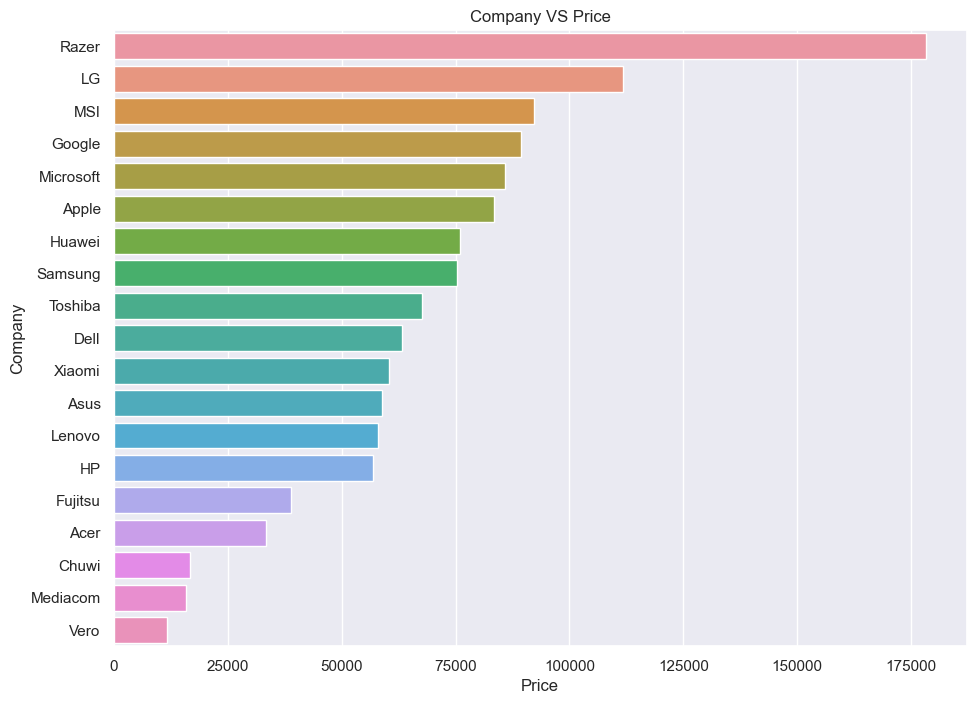

In [12]:
Company = data.groupby("Company")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("Company VS Price")
sns.barplot(x="Price",y="Company",data = Company)

<AxesSubplot:title={'center':'TypeName VS Price'}, xlabel='Price', ylabel='TypeName'>

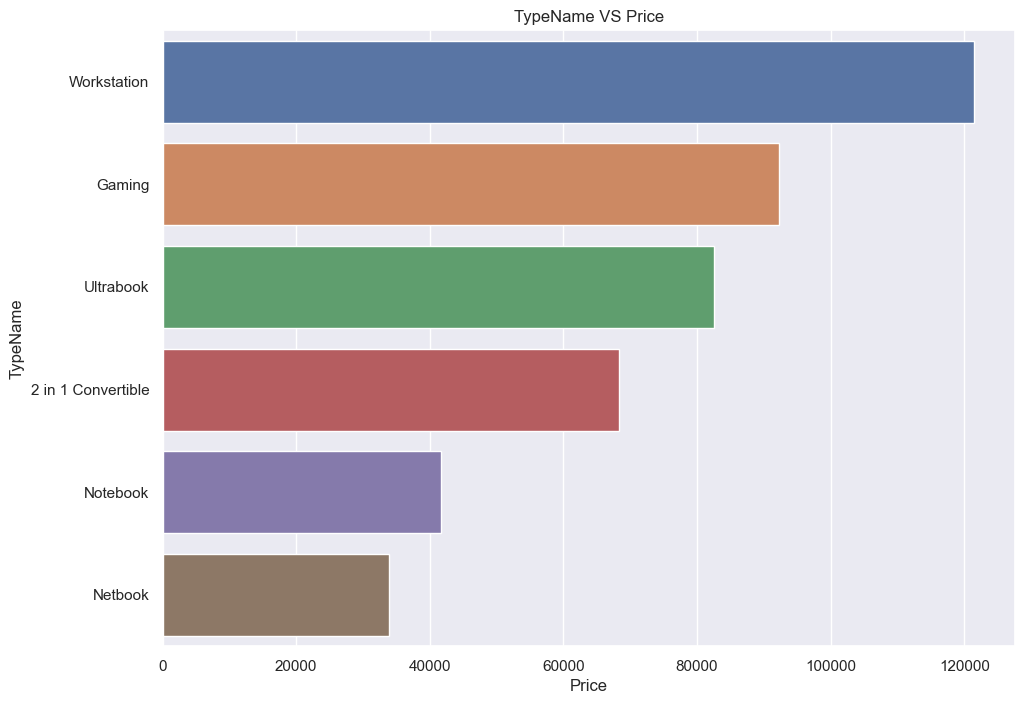

In [13]:
TypeName = data.groupby("TypeName")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("TypeName VS Price")
sns.barplot(x="Price",y="TypeName",data = TypeName)

<AxesSubplot:xlabel='Inches', ylabel='Price'>

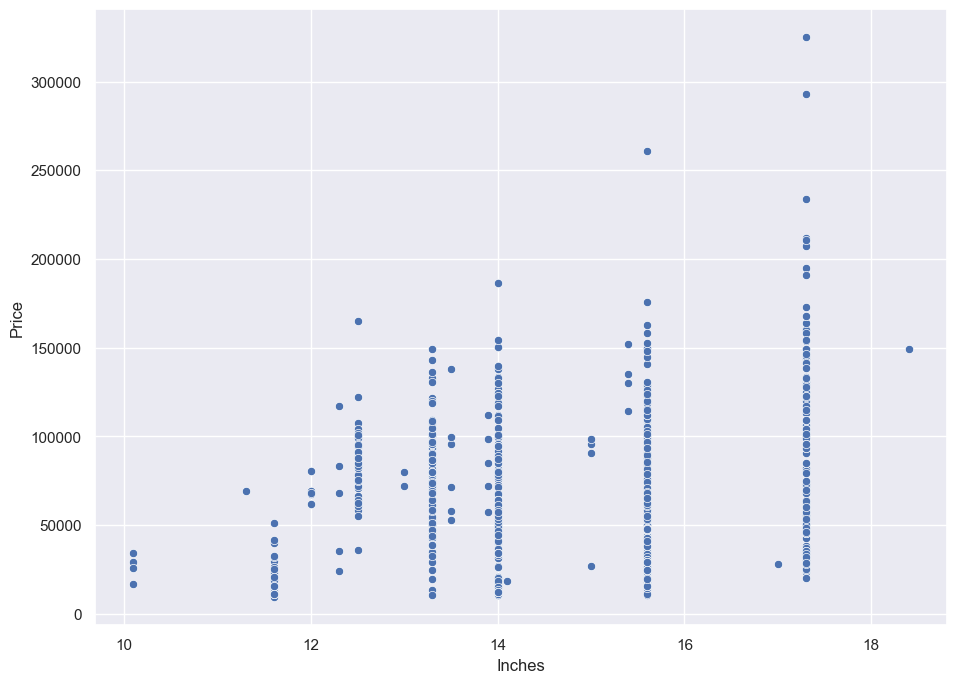

In [14]:
sns.scatterplot(x=data["Inches"],y=data["Price"])

In [15]:
# creating a function to fatch wether laptop touchscreen or not
def touchscreen(x):
    if "Touchscreen" in x:
        return 1
    else:
        return 0
data["Touchscreen"] = data["ScreenResolution"].apply(touchscreen)

<AxesSubplot:title={'center':'Touchscreen VS Price'}, xlabel='Touchscreen', ylabel='Price'>

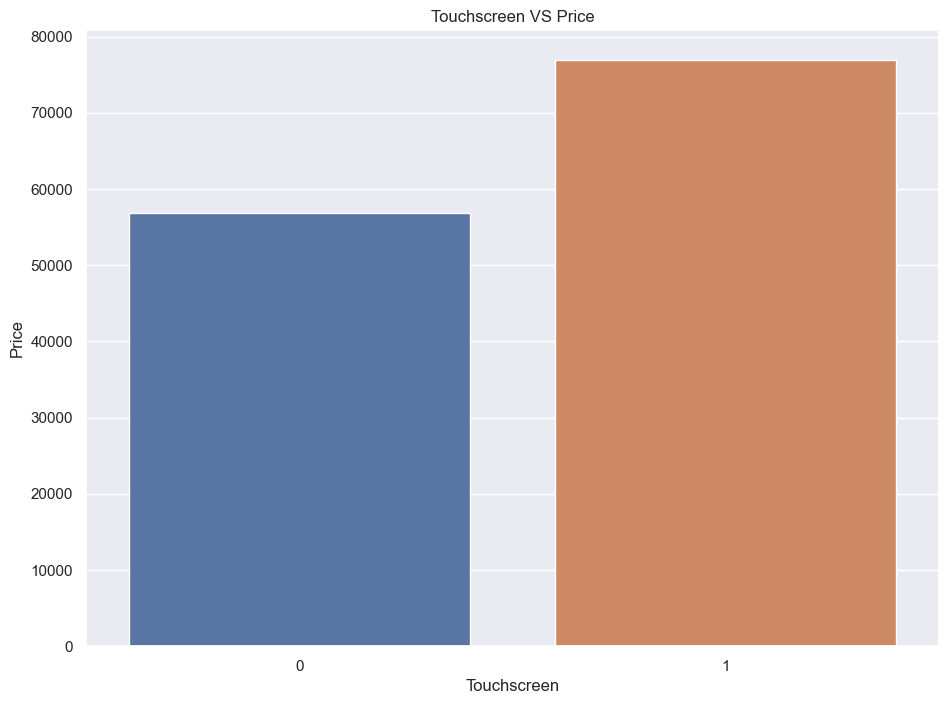

In [16]:
Touchscreen = data.groupby("Touchscreen")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("Touchscreen VS Price")
sns.barplot(x="Touchscreen",y="Price",data = Touchscreen)

In [17]:
# creating a function to fatch wether laptop ipspanel or not
def ipspanel(x):
    if "IPS" in x:
        return 1
    else:
        return 0
data["IPS_panel"] = data["ScreenResolution"].apply(ipspanel)

<AxesSubplot:title={'center':'IPS_panel VS Price'}, xlabel='IPS_panel', ylabel='Price'>

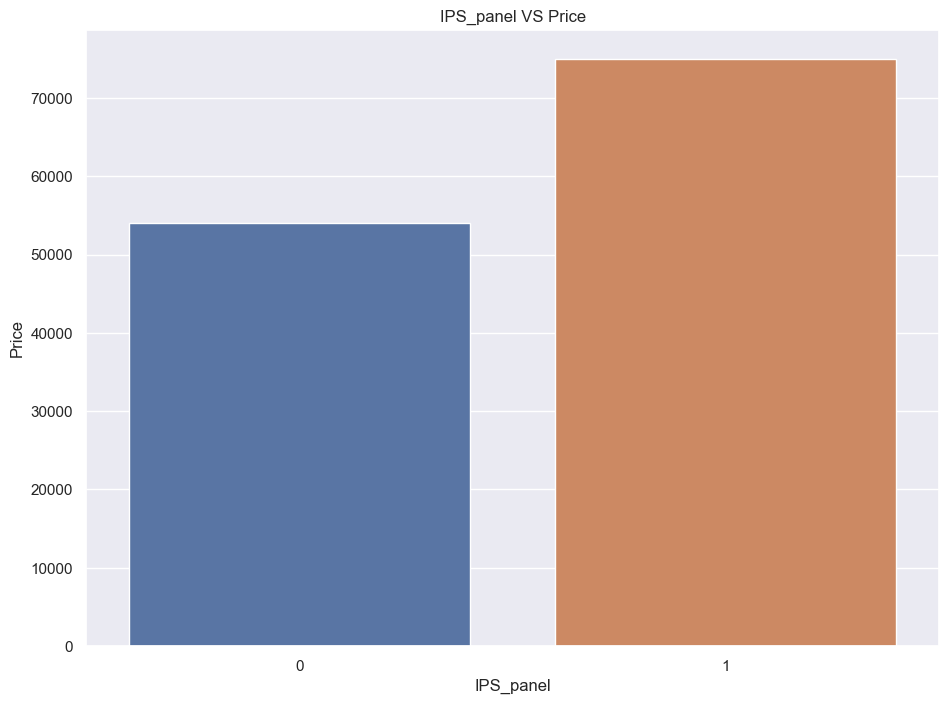

In [18]:
IPS_panel = data.groupby("IPS_panel")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("IPS_panel VS Price")
sns.barplot(x="IPS_panel",y="Price",data = IPS_panel)

In [19]:
# split the data and fatch the resolution
new = data["ScreenResolution"].str.split("x",n=1,expand=True)

In [20]:
data["ScreenResolution"] = data["ScreenResolution"].str.replace(",","").str.findall(r"(\d+\.?\d+)").apply(lambda x:"x".join(x))

In [21]:
# # use findall functioon to fatch only numeric values and convert in to int
# data["X_resolution"] = new[0]
# data["Y_resolution"] = new[1]
# data["X_resolution"] = data["X_resolution"].str.replace(",","").str.findall(r"(\d+\.?\d+)").apply(lambda x:x[0])
# data["X_resolution"] = data["X_resolution"].astype(int)
# data["Y_resolution"] = data["Y_resolution"].astype(int)

In [22]:
# # ppi is the combination of three columns x,y and inches      "Inches" "ScreenResolution"
# data["PPI"] = (((data["X_resolution"]**2) + (data["Y_resolution"]**2))**0.5/data["Inches"]).astype(float)

In [23]:
# data.drop(["Inches","Y_resolution","X_resolution","ScreenResolution"],axis=1,inplace=True)

In [24]:
# Fatch the cup name from cpu
data["Cpu_Names"] = data["Cpu"].apply(lambda x:" ".join(x.split(" ")[:3]))

In [25]:
# this function will fatch the requiret pricessor
def processor(x):
    if x == 'Intel Core i5' or x == 'Intel Core i3' or x == 'Intel Core i7':
        return x
    else:
        if x.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
data["Cpu_brand"] = data["Cpu_Names"].apply(processor)

<AxesSubplot:title={'center':'Cpu_brand VS Price'}, xlabel='Cpu_brand', ylabel='Price'>

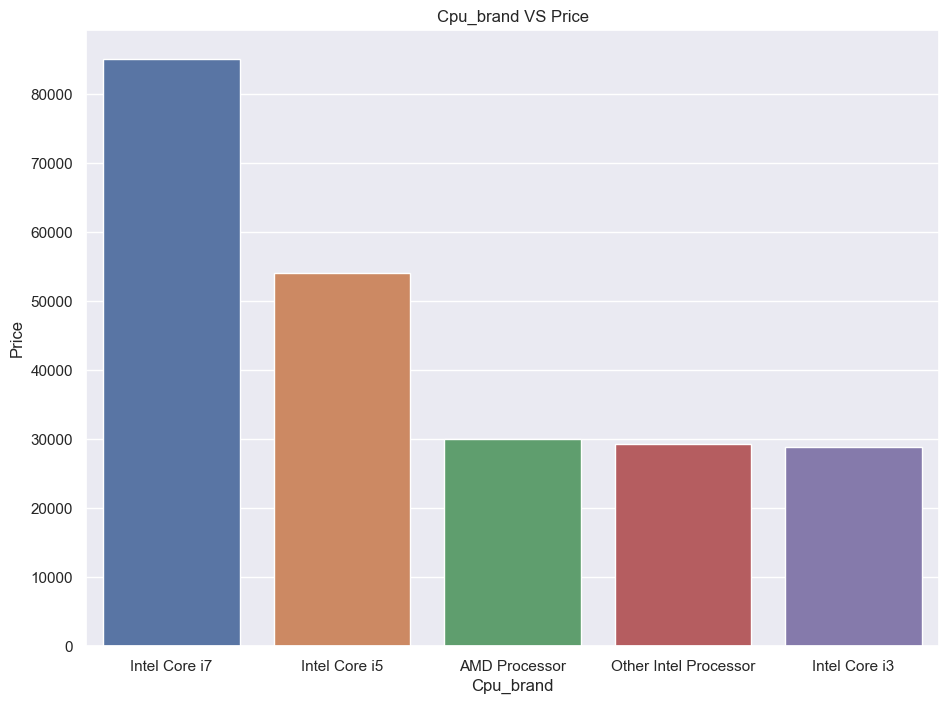

In [26]:
Cpu_brand = data.groupby("Cpu_brand")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("Cpu_brand VS Price")
sns.barplot(x="Cpu_brand",y="Price",data = Cpu_brand)

In [27]:
data.drop(["Cpu","Cpu_Names"],axis=1,inplace=True)

<AxesSubplot:title={'center':'Ram VS Price'}, xlabel='Ram', ylabel='Price'>

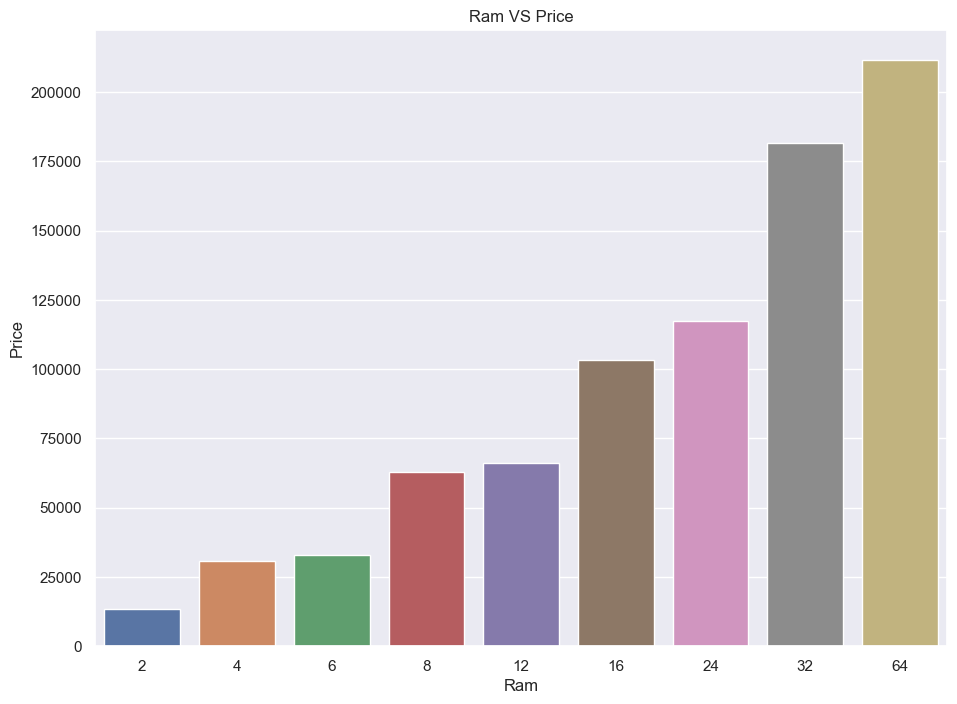

In [28]:
Ram = data.groupby("Ram")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("Ram VS Price")
sns.barplot(x="Ram",y="Price",data = Ram)

<AxesSubplot:ylabel='Ram'>

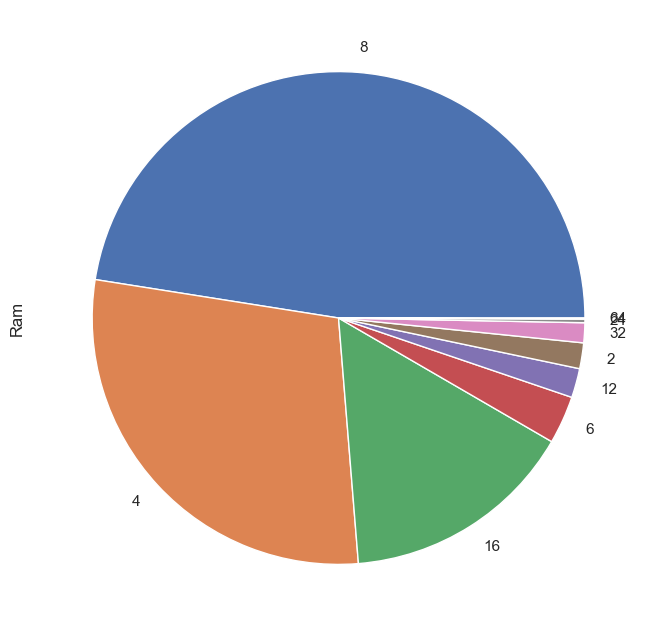

In [29]:
data["Ram"].value_counts().plot(kind="pie")

In [30]:
data["Memory"] = data["Memory"].astype(str).replace('\.0','',regex=True)
data["Memory"] = data["Memory"].str.replace("GB","")
data["Memory"] = data["Memory"].str.replace("TB","000")
new = data["Memory"].str.split("+",n=1,expand=True)

In [31]:
data["first"] = new[0]
data["first"] = data["first"].str.strip()

In [32]:
data["second"] = new[1]

In [33]:
# Create the function to fatch storage you want
def storage_hhd(x):
    if "HDD" in x:
        return 1
    else:
        return 0
data["Layer1HDD"] = data["first"].apply(storage_hhd)

def storage_sdd(x):
    if "SSD" in x:
        return 1
    else:
        return 0
    
data["Layer1SSD"] = data["first"].apply(storage_sdd)

def hybrid(x):
    if "Hybrid" in x:
        return 1
    else:
        return 0
data["Layer1Hybrid"] = data["first"].apply(hybrid)

def flashstorage(x):
    if "Flash Storage" in x:
        return 1
    else:
        return 0
data["Layer1FlashStorage"] = data["first"].apply(flashstorage)
data["first"] = data["first"].str.replace(r'\D','')

In [34]:
data["second"].fillna("0",inplace=True)
# Create the function to fatch storage you want
def storage_hhd(x):
    if "HDD" in x:
        return 1
    else:
        return 0
data["Layer2HDD"] = data["second"].apply(storage_hhd)

def storage_sdd(x):
    if "SSD" in x:
        return 1
    else:
        return 0
    
data["Layer2SSD"] = data["second"].apply(storage_sdd)

def hybrid(x):
    if "Hybrid" in x:
        return 1
    else:
        return 0
data["Layer2Hybrid"] = data["second"].apply(hybrid)

def flashstorage(x):
    if "Flash Storage" in x:
        return 1
    else:
        return 0
data["Layer2FlashStorage"] = data["second"].apply(flashstorage)
data["second"]= data["second"].str.replace(r'\D','')

In [35]:
# convert in to int
data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

In [36]:
data["HDD"] = (data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"] = (data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"] = (data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["FlashStorage"] = (data["first"]*data["Layer1FlashStorage"]+data["second"]*data["Layer2FlashStorage"])

In [37]:
data.drop(['first','second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage','Memory','Hybrid','FlashStorage'],axis=1,inplace=True)

<AxesSubplot:title={'center':'HDD VS Price'}, xlabel='HDD', ylabel='Price'>

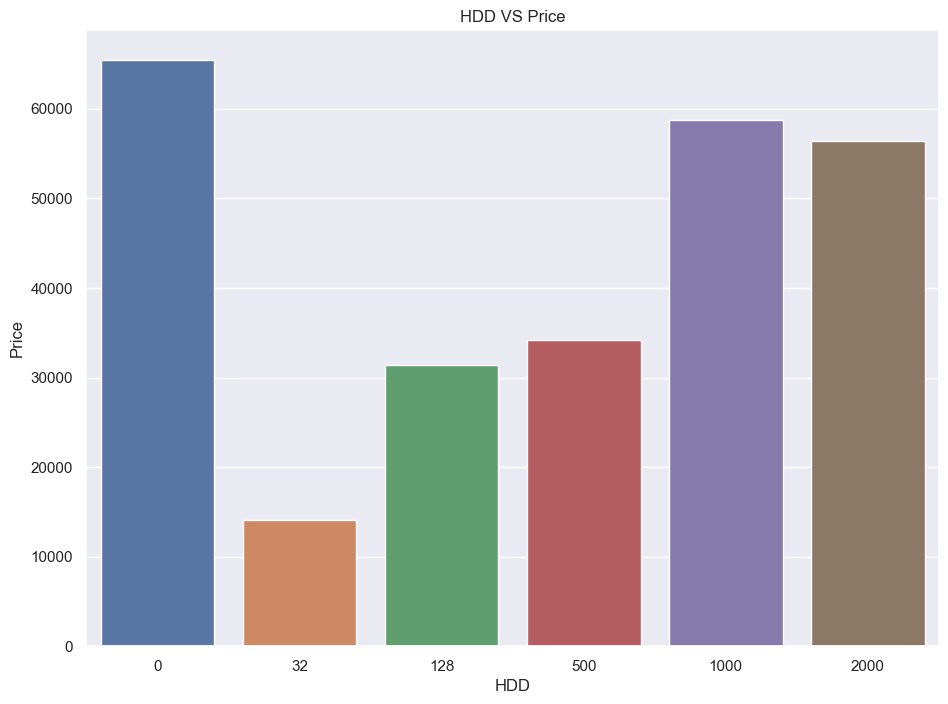

In [38]:
HDD = data.groupby("HDD")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("HDD VS Price")
sns.barplot(x="HDD",y="Price",data = HDD)

<AxesSubplot:title={'center':'SSD VS Price'}, xlabel='SSD', ylabel='Price'>

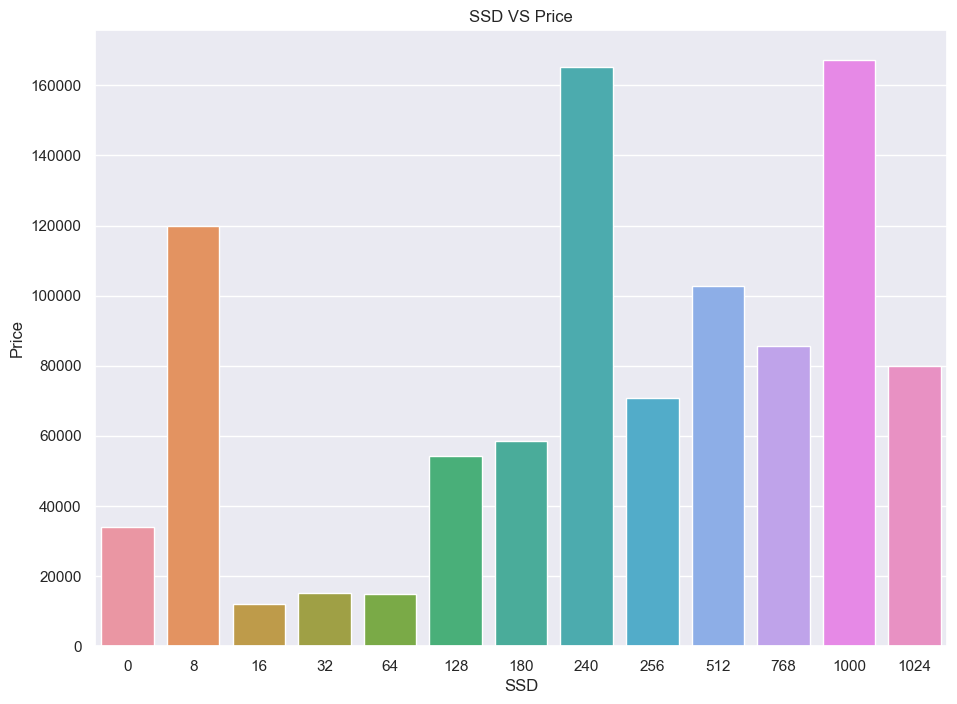

In [39]:
SSD = data.groupby("SSD")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("SSD VS Price")
sns.barplot(x="SSD",y="Price",data = SSD)

In [40]:
# fatch brand name from gpu
data["Gpu_brand"] = data["Gpu"].apply(lambda x:x.split(" ")[0])
# Drop ARM gup brand since it have only one value count
data = data[data["Gpu_brand"] != "ARM"]

<AxesSubplot:title={'center':'Gpu_brand VS Price'}, xlabel='Gpu_brand', ylabel='Price'>

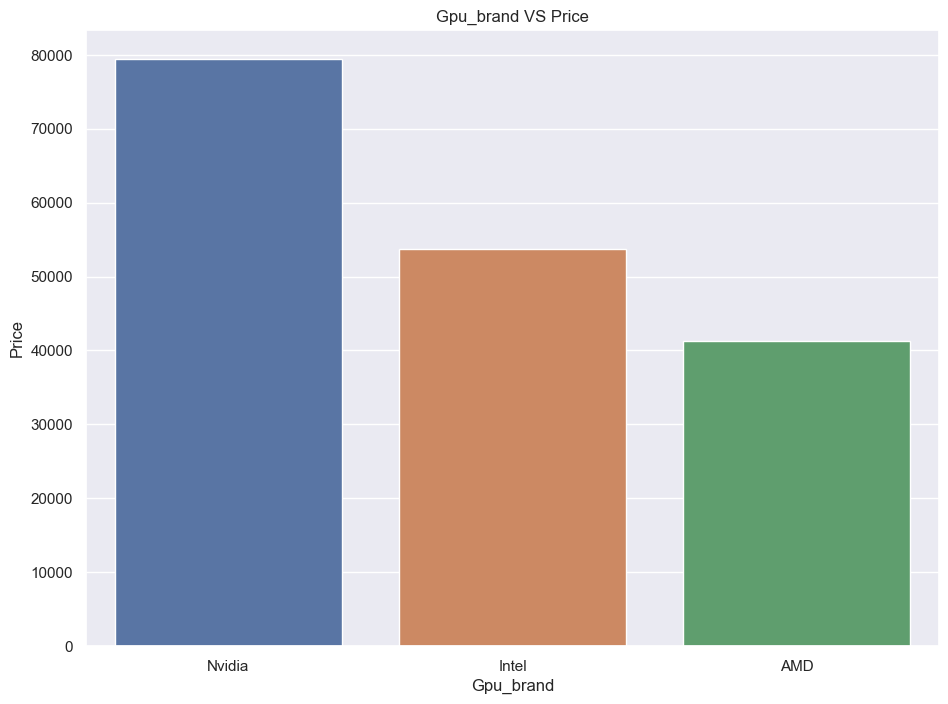

In [41]:
Gpu_brand = data.groupby("Gpu_brand")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("Gpu_brand VS Price")
sns.barplot(x="Gpu_brand",y="Price",data = Gpu_brand)

In [42]:
data.drop("Gpu",axis=1,inplace=True)

In [43]:
def os(x):
    if x == "Windows 10" or x == "Windows 7" or x == "Windows 10 S":
        return "Windows"
    elif x == "macOS" or x == "Mac OS X":
        return "Mac"
    else:
        return "Others/No OS/Linux"
data["OpSys"] = data["OpSys"].apply(os)

<AxesSubplot:title={'center':'OpSys VS Price'}, xlabel='OpSys', ylabel='Price'>

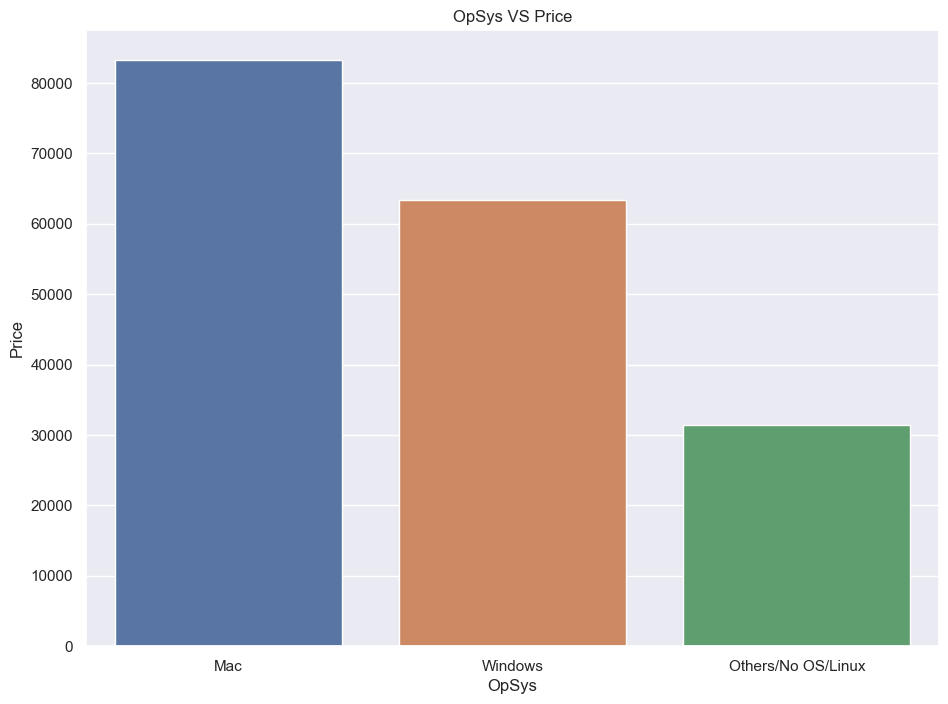

In [44]:
OpSys = data.groupby("OpSys")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("OpSys VS Price")
sns.barplot(x="OpSys",y="Price",data = OpSys)

In [45]:
# saprate numerical and catigorical data 
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Company', 'TypeName', 'ScreenResolution', 'OpSys', 'Cpu_brand',
       'Gpu_brand'],
      dtype='object')
Index(['Inches', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS_panel', 'HDD',
       'SSD'],
      dtype='object')


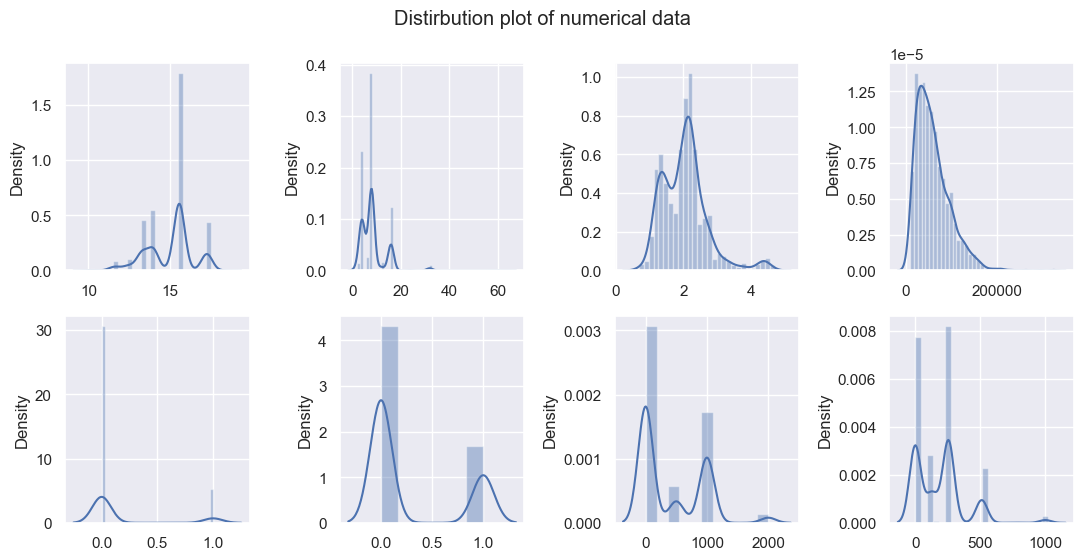

In [46]:
try:
    plt.suptitle("Distirbution plot of numerical data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

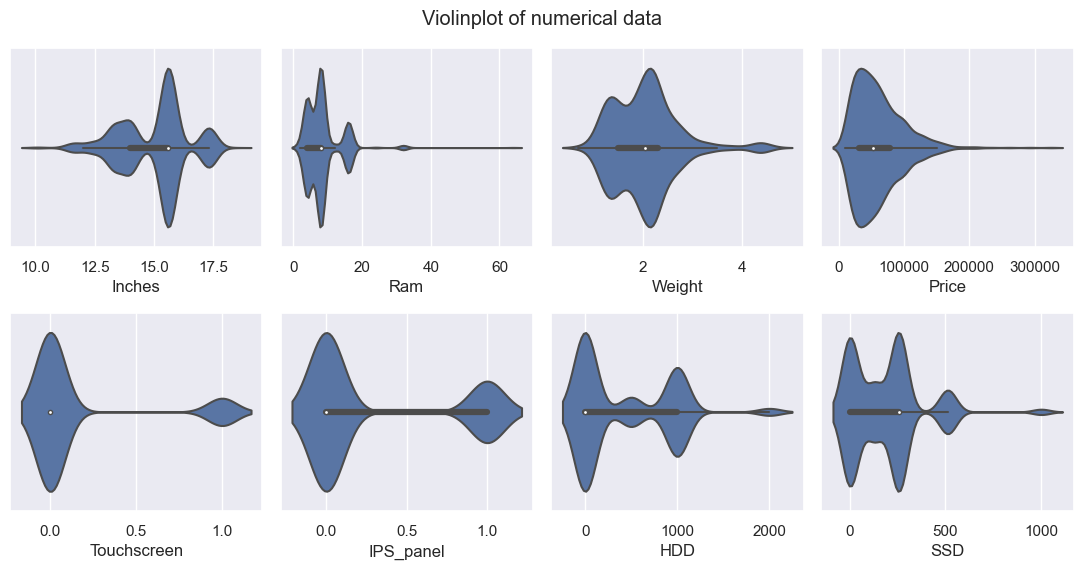

In [47]:
try:
    plt.suptitle("Violinplot of numerical data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.violinplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

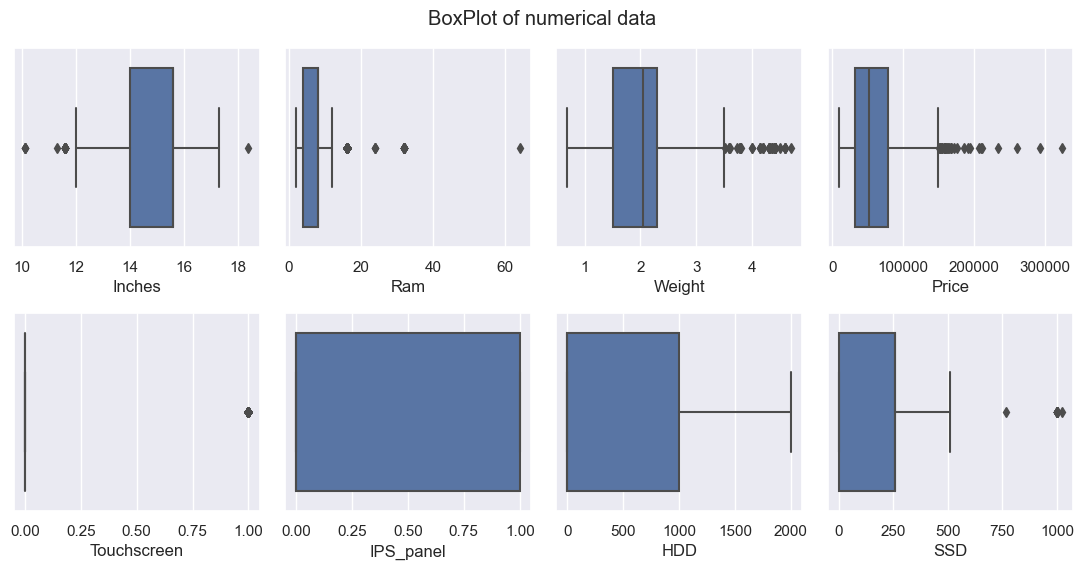

In [48]:
try:
    plt.suptitle("BoxPlot of numerical data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:>

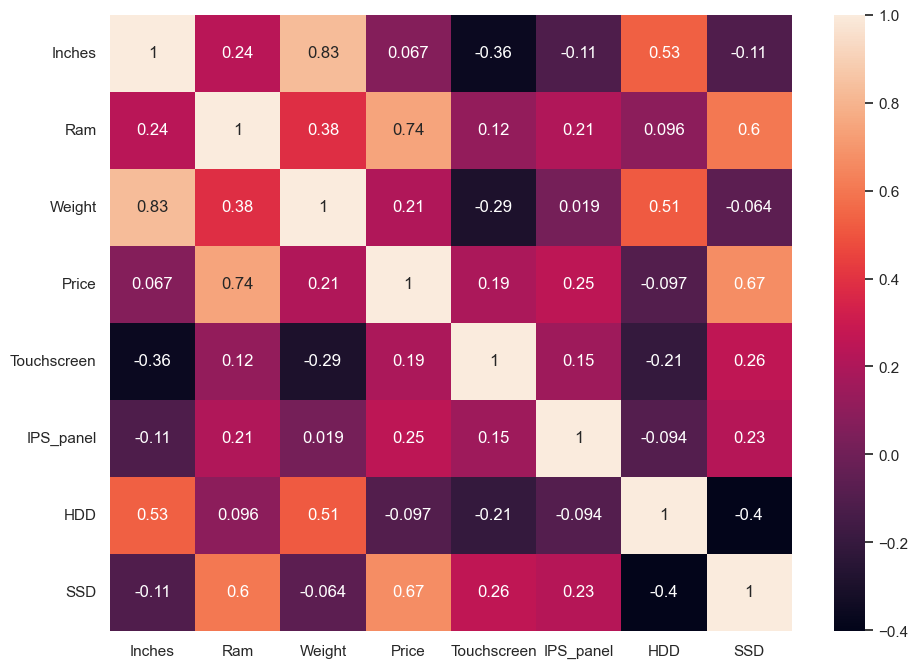

In [49]:
sns.heatmap(data.corr(),annot=True)

In [50]:
# appliying log transformation on price to convert in 
# to  normaldistrivution
data["PRICE"] = data["Price"]
data.drop("Price",axis=1,inplace=True)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

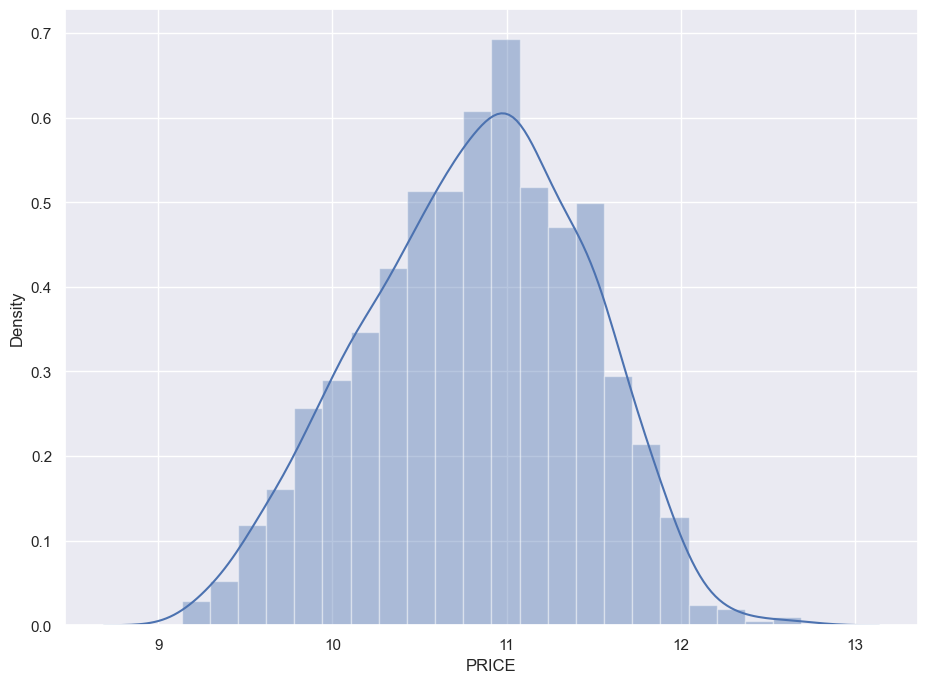

In [51]:
sns.distplot(np.log(data["PRICE"]))

## Model Traning 

In [52]:
data

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Touchscreen,IPS_panel,Cpu_brand,HDD,SSD,Gpu_brand,PRICE
0,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,0,128,Intel,71378.6832
1,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,0,0,Intel Core i5,0,0,Intel,47895.5232
2,HP,Notebook,15.6,1920x1080,8,Others/No OS/Linux,1.86,0,0,Intel Core i5,0,256,Intel,30636.0000
3,Apple,Ultrabook,15.4,2880x1800,16,Mac,1.83,0,1,Intel Core i7,0,512,AMD,135195.3360
4,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,0,256,Intel,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,Windows,1.80,1,1,Intel Core i7,0,128,Intel,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,Windows,1.30,1,1,Intel Core i7,0,512,Intel,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,2,Windows,1.50,0,0,Other Intel Processor,0,0,Intel,12201.1200
1301,HP,Notebook,15.6,1366x768,6,Windows,2.19,0,0,Intel Core i7,1000,0,AMD,40705.9200


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Inches            1302 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Ram               1302 non-null   int32  
 5   OpSys             1302 non-null   object 
 6   Weight            1302 non-null   float64
 7   Touchscreen       1302 non-null   int64  
 8   IPS_panel         1302 non-null   int64  
 9   Cpu_brand         1302 non-null   object 
 10  HDD               1302 non-null   int64  
 11  SSD               1302 non-null   int64  
 12  Gpu_brand         1302 non-null   object 
 13  PRICE             1302 non-null   float64
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 147.5+ KB


In [54]:
# saprate numerical and catigorical data 
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Company', 'TypeName', 'ScreenResolution', 'OpSys', 'Cpu_brand',
       'Gpu_brand'],
      dtype='object')
Index(['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS_panel', 'HDD', 'SSD',
       'PRICE'],
      dtype='object')


In [55]:
# saprate dependent  and indipendent features
x = data.drop('PRICE',axis=1)
y = np.log(data['PRICE'])

In [56]:
# saprate numerical and catigorical data 
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Company', 'TypeName', 'ScreenResolution', 'OpSys', 'Cpu_brand',
       'Gpu_brand'],
      dtype='object')
Index(['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS_panel', 'HDD', 'SSD'], dtype='object')


In [57]:
from  sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [58]:
# Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("Scaler",StandardScaler())
    ]
)

# Catigorical Pipline
cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore")),
        ("Scaler",StandardScaler(with_mean=False))
    ]
)

# Create preprocessor Object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [59]:
# split train and test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1041, 13)
(261, 13)
(1041,)
(261,)


In [61]:
# Apply preprocessor object 
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [63]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [64]:
## Without Hyperameters
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    "SVR":SVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "ExtraTreeRegressor":ExtraTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "BaggingRegressor":BaggingRegressor(GradientBoostingRegressor())
    
    
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    # Make Prediction
    y_predict = model.predict(X_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)

LinearRegression
Model Traning Performance
MSE 7.391739641437149
MAE 21.840445433928547
RMSE 27.187753937089305
R2 80.81530989370268
Ridge
Model Traning Performance
MSE 7.346674904142593
MAE 21.75709981222059
RMSE 27.10475032931053
R2 80.93227194345766
Lesso
Model Traning Performance
MSE 38.61422273556084
MAE 50.11341577821964
RMSE 62.14034336528954
R2 -0.2202367524465565
Elastic
Model Traning Performance
MSE 38.61422273556084
MAE 50.11341577821964
RMSE 62.14034336528954
R2 -0.2202367524465565
SVR
Model Traning Performance
MSE 5.45720573458984
MAE 17.274216404724914
RMSE 23.360662949903286
R2 85.8362434361853
DecisionTreeRegressor
Model Traning Performance
MSE 5.831663684295289
MAE 17.951053941283394
RMSE 24.148837827720175
R2 84.86436671008056
ExtraTreeRegressor
Model Traning Performance
MSE 7.413065606249806
MAE 19.77726535677191
RMSE 27.22694548833895
R2 80.75995999692667
RandomForestRegressor
Model Traning Performance
MSE 4.711940872126359
MAE 16.265994543638318
RMSE 21.70700548699

In [65]:
trainig_score

[0.8452056909542012,
 0.8453515110082829,
 0.0,
 0.0,
 0.9228616534074241,
 0.9956294112617249,
 0.9956294112617249,
 0.9799359628735504,
 0.8264600757273153,
 0.9112604497233965,
 0.889001863826283,
 0.9097038298071425]

Text(0, 0.5, 'Predictions')

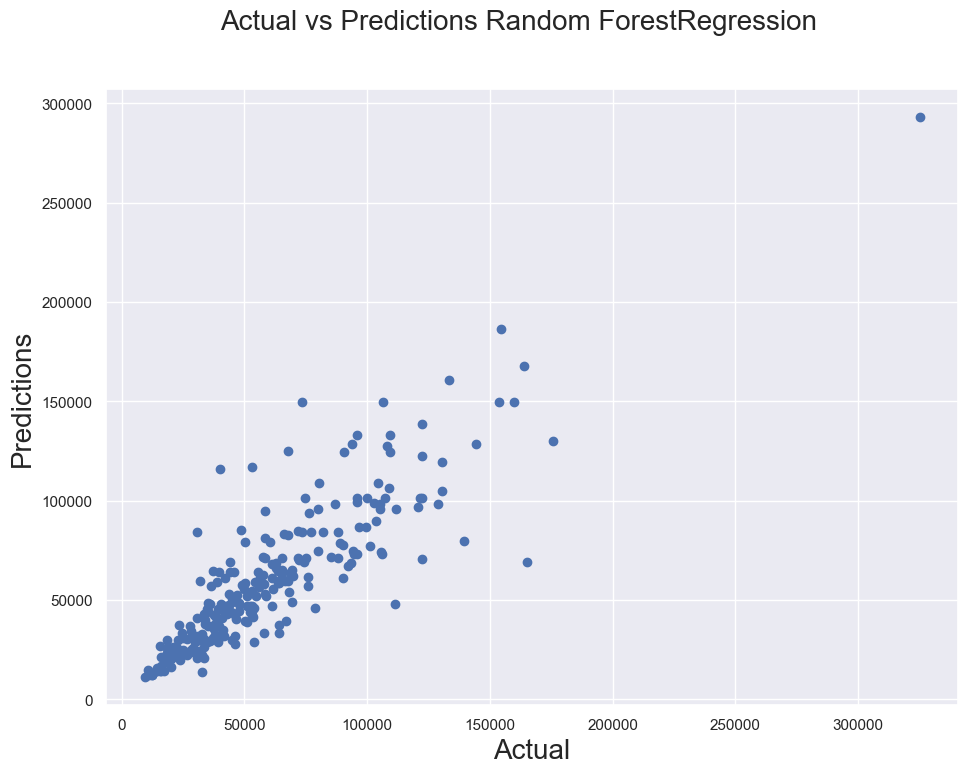

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(np.exp(y_test),np.exp(y_predict_list[6]))
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=20)                          # X-label
plt.ylabel('Predictions', fontsize=20)

In [67]:
# Define models and their hyperparameters for GridSearchCV
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10,20]
        }
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10,20]
        }
    },
    "Elastic Net": {
        "model": ElasticNet(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10],
            "l1_ratio": [0.2, 0.4, 0.6, 0.8]
        }
    },
    "Decision Tree Regressor": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "splitter":['best','random'],
            "max_depth": [3, 5, 7, 9, 11],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features":["auto","sqrt","log2"]
        }
    },
    "RandomForestRegressor":{
        "model":RandomForestRegressor(random_state=3),
        "params":{
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            'n_estimators': [100,150,300],
            'max_depth': [8,10,15,20],
            'min_samples_split': [0.5,4, 5],
            'min_samples_leaf': [3, 5, 6],
        }
    },
    "ExtraTreeRegressor": {
        "model": ExtraTreeRegressor(),
        "params": {
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "splitter":['best','random'],
            "max_depth": [8,12,13,20,25],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features":["auto","sqrt","log2"],
        }
    },
    "SVR": {
        "model": SVR(kernel='rbf'),
        "params": {
            "gamma":["scale", "auto"],
            "C": [0.01, 0.1, 1, 10],
        }
    },
    "AdaBoostRegressor": {
        "model": AdaBoostRegressor(),
        "params": {
            'n_estimators': [ 180, 200,300],
            "learning_rate":[0.1,0.001,0.01,1,0.00001],
            "loss":["linear", "square", "exponential"]
        }
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor(),
        "params": {
            'n_estimators': [ 180, 200,300,400],
            "learning_rate":[0.1,0.001,0.01,1,0.00001],
            "loss":["squared_error", "absolute_error", "huber", "quantile"],
            "max_depth": [8,10,15,20,30],
            "min_samples_split": [8,10,6,20,25],
            "min_samples_leaf": [5,6,8,10,15,20],
            "max_features":["auto","sqrt","log2"],
        }
    },
    "KNeighborsRegressor": {
        "model": KNeighborsRegressor(),
        "params": {
            "n_neighbors":[8,10,15,18],
            "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
            "leaf_size":[35,40,45,50],  
        },
    "BaggingRegressor": {
        "model": BaggingRegressor(GradientBoostingRegressor()),
        "params": {
        }
    }
}
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

# Train and evaluate models using GridSearchCV
for model_name, model_params in models.items():
    model = model_params["model"]
    params = model_params["params"]
    randomcv = RandomizedSearchCV(model, params, cv=5)
    randomcv.fit(X_train, y_train)
    score = randomcv.score(X_train, y_train)
    y_pred = randomcv.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {randomcv.best_params_}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R-squared: {r2_score(y_test, y_pred)}\n")
    
    r2_list.append(r2_score)
    y_predict_list.append(y_pred)
    trainig_score.append(score)

Model: Linear Regression
Best Parameters: {}
MAE: 0.21840445433928546
RMSE: 0.27187753937089304
R-squared: 0.8081530989370267

Model: Lasso
Best Parameters: {'alpha': 0.01}
MAE: 0.22207801316108447
RMSE: 0.2756954004125669
R-squared: 0.802727218467192

Model: Ridge
Best Parameters: {'alpha': 20}
MAE: 0.21740304186573842
RMSE: 0.27072886906169896
R-squared: 0.8097707633861071

Model: Elastic Net
Best Parameters: {'l1_ratio': 0.4, 'alpha': 0.01}
MAE: 0.21867539432964295
RMSE: 0.27144105216943676
R-squared: 0.8087686076529623

Model: Decision Tree Regressor
Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 11, 'criterion': 'squared_error'}
MAE: 0.19829197374694116
RMSE: 0.27648976913655127
R-squared: 0.8015887657395045

Model: RandomForestRegressor
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 20, 'criterion': 'absolute_error'}
MAE: 0.18271961416178484
RMSE: 0.244

In [68]:
trainig_score

[0.8452056909542012,
 0.833714821144778,
 0.8451696829832342,
 0.842559020835086,
 0.931526956077441,
 0.9376436936072015,
 0.8993724042983902,
 0.9513940903414753,
 0.8312424128518463,
 0.9768219135528624,
 0.8640259073323657]

Text(0, 0.5, 'Predictions')

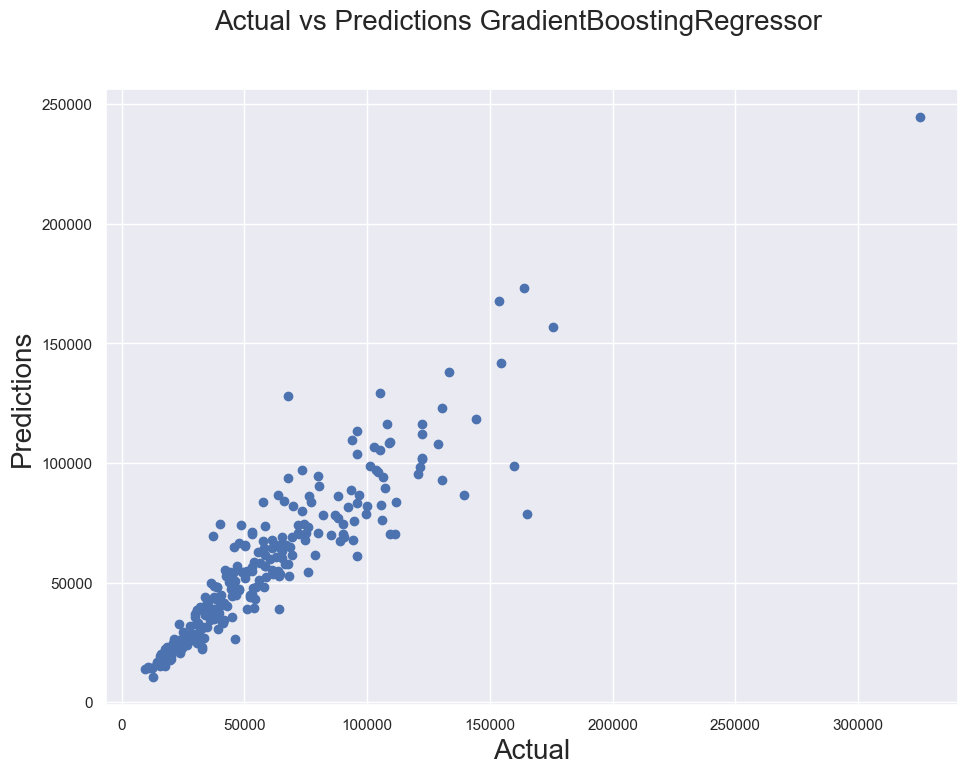

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(np.exp(y_test),np.exp(y_predict_list[-2]))
fig.suptitle('Actual vs Predictions GradientBoostingRegressor', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=20)                          # X-label
plt.ylabel('Predictions', fontsize=20)

In [70]:
data.to_csv("clean_laptop.csv",index=False)

In [71]:
0.9841436900697633-0.8928136331364669


0.09133005693329643

In [72]:
np.exp(y_test)[:30]

478      35964.0000
724      71847.0144
312     111834.7200
851     101178.7200
1276     24455.5200
115      74538.1872
816      95850.7200
722      79866.7200
1142     86793.1200
101      18594.7200
1286     12201.1200
900     107257.9680
1218     67772.1600
710      66546.7200
869      94731.8400
220      36089.2080
1167     24935.0400
898      32713.9200
538      95850.7200
184      63882.7200
566      51095.5200
1043     55922.6880
1055     37570.3920
1075     35111.5200
581      53733.9456
44       53226.7200
599      93932.6400
471      61485.1200
846      32767.2000
494      67612.3200
Name: PRICE, dtype: float64

In [73]:
# 'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 20, 'loss': 'squared_error', 'learning_rate': 0.1

In [91]:
data["Gpu_brand"].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

In [94]:
data.head(100)

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Touchscreen,IPS_panel,Cpu_brand,HDD,SSD,Gpu_brand,PRICE
0,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,0,128,Intel,71378.6832
1,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,0,0,Intel Core i5,0,0,Intel,47895.5232
2,HP,Notebook,15.6,1920x1080,8,Others/No OS/Linux,1.86,0,0,Intel Core i5,0,256,Intel,30636.0000
3,Apple,Ultrabook,15.4,2880x1800,16,Mac,1.83,0,1,Intel Core i7,0,512,AMD,135195.3360
4,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,0,256,Intel,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Acer,2 in 1 Convertible,13.3,1920x1080,8,Windows,1.50,1,1,Intel Core i5,0,256,Intel,45128.1600
96,Dell,Notebook,15.6,1920x1080,8,Others/No OS/Linux,2.20,0,0,Intel Core i7,1000,0,AMD,31962.6720
97,Dell,Notebook,15.6,1920x1080,4,Others/No OS/Linux,2.20,0,0,Intel Core i3,0,256,AMD,25840.8000
98,Asus,Notebook,15.6,1920x1080,6,Windows,2.00,0,0,Intel Core i3,0,256,Nvidia,30742.5600


In [90]:

sorted([ 128,    0,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,240,    8])

[0, 8, 16, 32, 64, 128, 180, 240, 256, 512, 768, 1000, 1024]